<a href="https://colab.research.google.com/github/meganhsu/Python-Image-Recognition/blob/master/Image_Recognition_Trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# image 
## dataset, image recognition model
##10 labels
## cifar-10
##training mode
##train & test model

In [0]:
# Image_Recognition_Trainer

In [22]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving images (6).jpg to images (6).jpg


In [23]:
!ls

'images (6).jpg'   Junji.jpg   sample_data   Train_model.h5


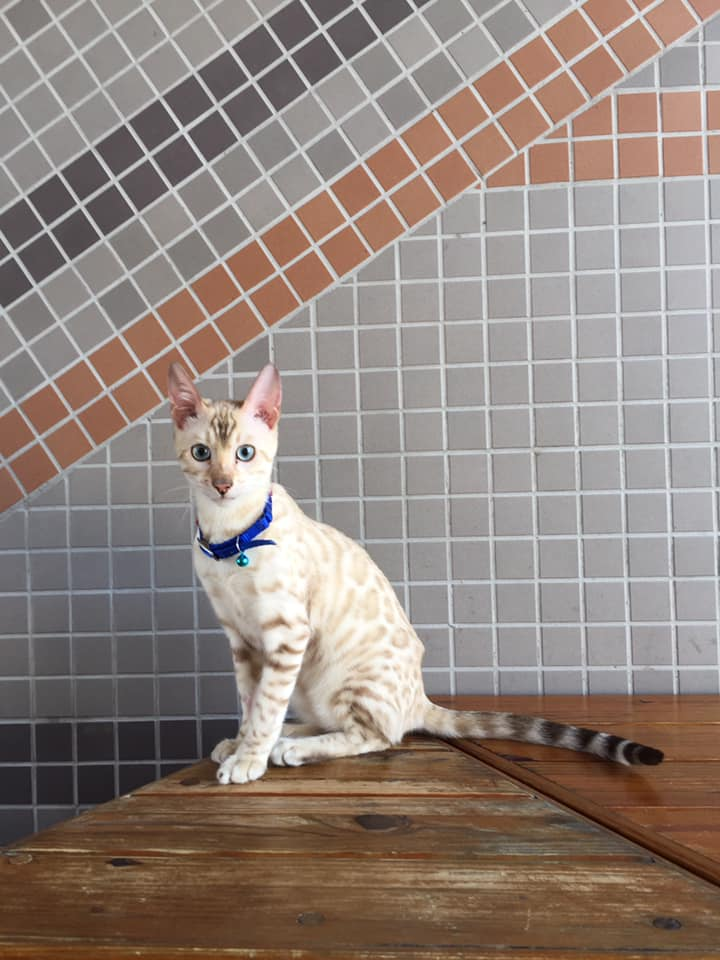

In [0]:
Image('Junji.jpg', width = 200)
# Image('images (6) (1).jpg', width = 200)

In [0]:
!pip install PyDrive # 安装一个包

    100% |████████████████████████████████| 993kB 20.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
# 以下两句代码在 Google Colab 才需要添加，其他平台忽略
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 授权 Google ADK
# 必须授权 Google SDK 从 Colab 访问 Google 云端硬盘
# 执行命令

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from  PIL import Image

cat_image_pathname ='images (6).jpg'
type(cat_image_pathname)


str

In [0]:
cat_image = Image.open(cat_image_pathname)
cat_image.show(cat_image)
type(cat_image)

PIL.JpegImagePlugin.JpegImageFile

In [0]:
display_image_pathname = input('Enter image pathname: ')
display_image = Image.open(display_image_pathname)
display_image.show()

Enter image pathname: Junji.jpg


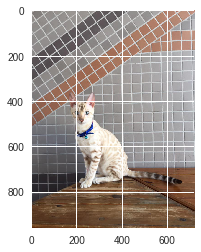

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('Junji.jpg','r')
imshow(np.asarray(pil_im))

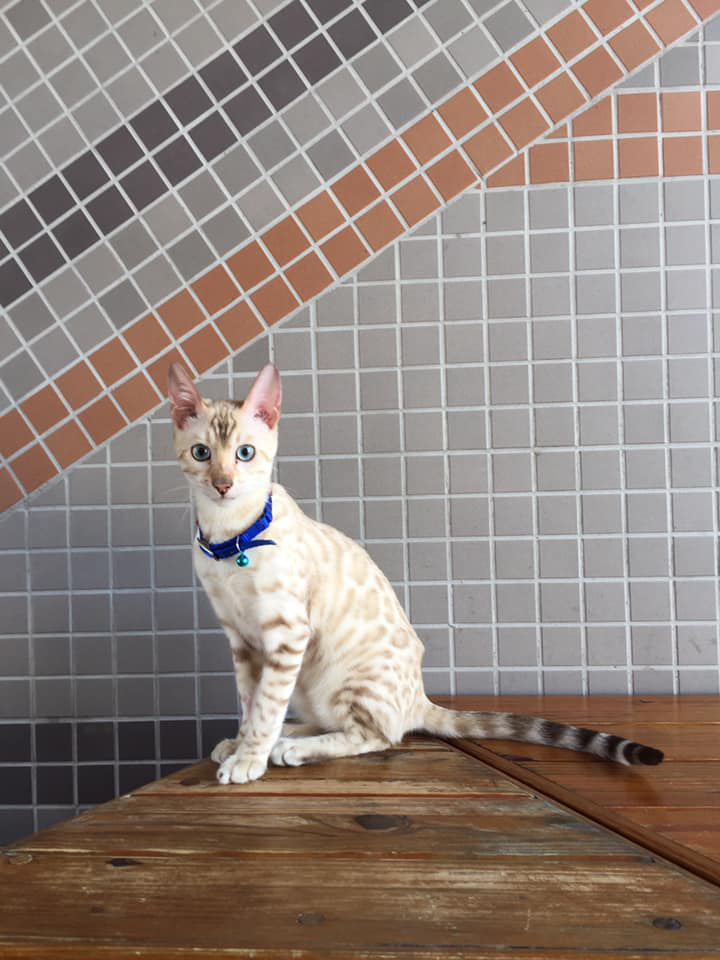

In [0]:
from PIL import Image               # to load images
from IPython.display import display # to display images

pil_im = Image.open('Junji.jpg')
display(pil_im)

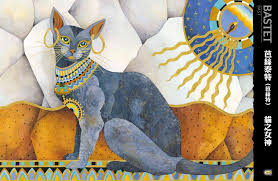

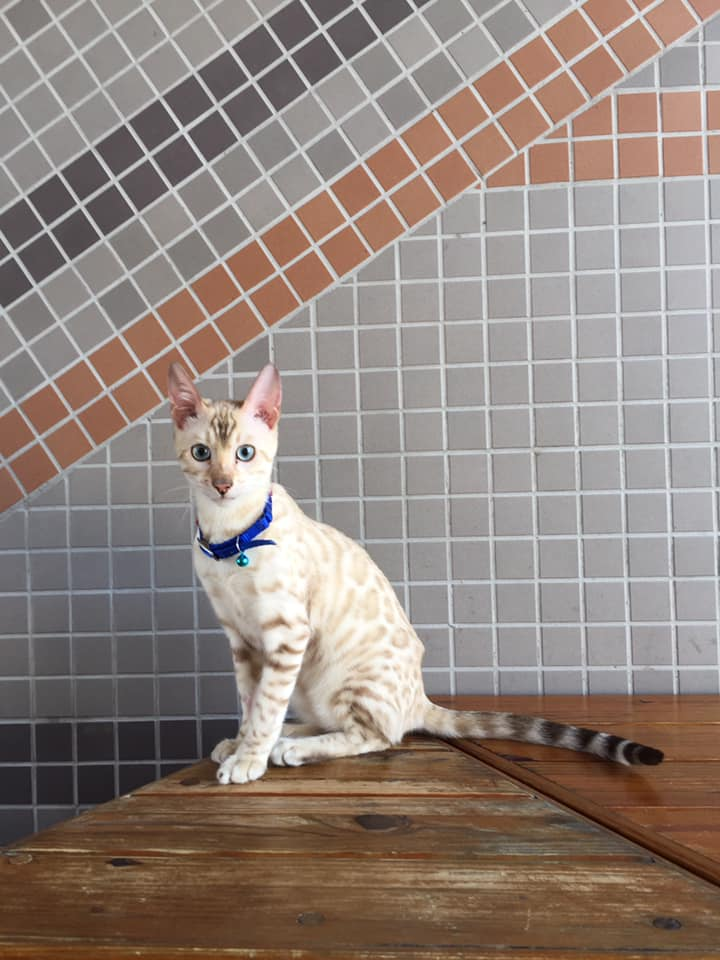

In [0]:
from IPython.display import Image, display
display(Image('images (6).jpg', width = 200, height = 150))
display(Image('Junji.jpg', width = 200))

In [0]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# print(X_train, y_train)
# print(X_test, y_test)

Enter an image index: 80
cat


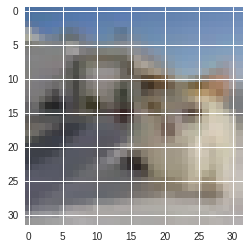

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

index = int(input('Enter an image index: '))
display_image = X_train[index]
display_label = y_train[index][0]

from matplotlib import pyplot as plt

print(labels[display_label])
plt.imshow(display_image)
plt.show()

# final_image = Image.fromarray(display_image)
# final_image.show()
# print(labels[display_label])

# from IPython.display import Image, display
# display(Image(final_image, width = 200, height = 150))

dog


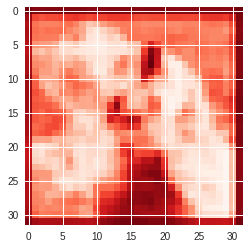

In [0]:
from matplotlib import pyplot as plt

red_image = Image.fromarray(display_image)
red, green, blue = red_image.split()

print(labels[display_label])
plt.imshow(red, cmap = 'Reds')
plt.show()

dog


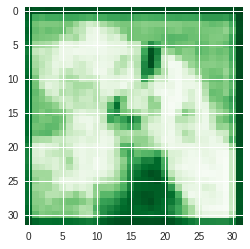

In [0]:
# green_image = Image.fromarray(display_image)
# red, green, blue = green_image.split()

print(labels[display_label])
plt.imshow(green, cmap = 'Greens')
plt.show()

cat


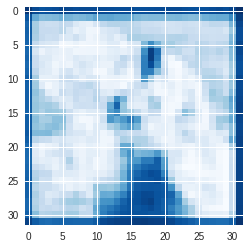

In [0]:
print(labels[display_label])
plt.imshow(blue, cmap = 'Blues')
plt.show()

In [20]:
from PIL import Image

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()



from keras.utils import np_utils

new_X_train = X_train.astype('float32')
new_X_test = X_test.astype('float32')
new_X_train /= 255
new_X_test /= 255
new_Y_train = np_utils.to_categorical(y_train)
new_Y_test = np_utils.to_categorical(y_test)


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm


# (3,  3), x axis, y axis
# (32, 32, 3), 3 means: red, green, blue

model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 activation = 'relu', padding='same', 
                kernel_constraint=maxnorm(3))) 
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(lr=0.01), metrics=['accuracy'])
model.fit(new_X_train, new_Y_train, epochs = 10, batch_size=32)

import h5py
model.save('Train_model.h5')




Epoch 1/10
50000/50000 [==============================] - 155s 3ms/step - loss: 1.9302 - acc: 0.3101
Epoch 2/10
50000/50000 [==============================] - 158s 3ms/step - loss: 1.6357 - acc: 0.4193
Epoch 3/10
50000/50000 [==============================] - 155s 3ms/step - loss: 1.4771 - acc: 0.4756
Epoch 4/10
50000/50000 [==============================] - 155s 3ms/step - loss: 1.3733 - acc: 0.5126
Epoch 5/10
50000/50000 [==============================] - 155s 3ms/step - loss: 1.2970 - acc: 0.5402
Epoch 6/10
50000/50000 [==============================] - 156s 3ms/step - loss: 1.2398 - acc: 0.5621
Epoch 7/10
50000/50000 [==============================] - 159s 3ms/step - loss: 1.1879 - acc: 0.5805
Epoch 8/10
50000/50000 [==============================] - 158s 3ms/step - loss: 1.1443 - acc: 0.5974
Epoch 9/10
50000/50000 [==============================] - 156s 3ms/step - loss: 1.1045 - acc: 0.6108
Epoch 10/10
50000/50000 [==============================] - 156s 3ms/step - loss: 1.0681 - a

In [27]:
!ls

'images (6).jpg'   Junji.jpg   sample_data   Train_model.h5


In [28]:
from PIL import Image
import numpy as np
from keras.models import load_model

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

model = load_model('Train_model.h5')

input_path = input('Enter image file pathname: ')
input_image = Image.open(input_path)
input_image = input_image.resize((32, 32)
              , resample = Image.LANCZOS)
image_array = np.array(input_image)
image_array = image_array.astype('float32')
image_array /= 255.0
image_array = image_array.reshape(1,32,32,3)
answer = model.predict(image_array)
input_image.show()
print(labels[np.argmax(answer)])



OSError: ignored